# Practica 6: Modelo lineal multivariado y transformaciones de datos

In [1]:
import numpy as np 
import pandas as pd
import seaborn.objects as so
from formulaic import Formula
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import PolynomialFeatures 

In [7]:
# Ejercicio 1
macroFull = pd.read_csv("../../datasets/macro_full_columns.csv")
macroFullOfertas = macroFull[[col for col in macroFull.columns if col.endswith(".oferta")]]
y, X = (
    Formula("PBI_a_precios_de_mercado.oferta ~ Agricultura_caza_silvicultura_y_pesca.oferta + Explotacion_de_minas_y_canteras.oferta + Industria_manufacturera.oferta + Electricidad_gas_y_agua.oferta+Construccion.oferta + Comercio_hoteles_y_restaurantes.oferta + Transp_Almac_y_Comunics.oferta + Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta + Servs_Socs_Comunales_Y_Personales.oferta + Impuesto_Prod_Netos_De_Subsid.oferta - 1")
    .get_model_matrix(macroFullOfertas)
    )
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X,y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
ecm = mean_squared_error(y, y_pred)

print("Coeficiente de determinacion: ", r2)
print("Error cuadratico medio: ", np.sqrt(ecm)/1e10)

Coeficiente de determinacion:  0.999963311798858
Error cuadratico medio:  0.09801244411419206


In [3]:
# Con 6 variables
y_6, X_6 = (
    Formula("PBI_a_precios_de_mercado.oferta ~ Industria_manufacturera.oferta + Electricidad_gas_y_agua.oferta + Comercio_hoteles_y_restaurantes.oferta +  Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta + Servs_Socs_Comunales_Y_Personales.oferta + Impuesto_Prod_Netos_De_Subsid.oferta - 1")
    .get_model_matrix(macroFullOfertas)
    )
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X_6,y_6)
y_pred6 = modelo.predict(X_6)
r2 = r2_score(y_6, y_pred6)
ecm = mean_squared_error(y_6, y_pred6)

print("Coeficiente de determinacion: ", r2)
print("Error cuadratico medio: ", np.sqrt(ecm)/1e10)

Coeficiente de determinacion:  0.9995131071994597
Error cuadratico medio:  0.35705464433986883


In [4]:
# Con 3 variables
y_3, X_3 = (
    Formula("PBI_a_precios_de_mercado.oferta ~ Industria_manufacturera.oferta + Comercio_hoteles_y_restaurantes.oferta + Servs_Socs_Comunales_Y_Personales.oferta - 1")
    .get_model_matrix(macroFullOfertas)
    )
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X_3,y_3)
y_pred3 = modelo.predict(X_3)
r2 = r2_score(y_3, y_pred3)
ecm = mean_squared_error(y_3, y_pred3)

print("Coeficiente de determinacion: ", r2)
print("Error cuadratico medio: ", np.sqrt(ecm)/1e10)

Coeficiente de determinacion:  0.9920850488504209
Error cuadratico medio:  1.4396009660709448


Coeficiente de determinacion:  0.9834435717834606
Error cuadratico medio:  2.082098806828077


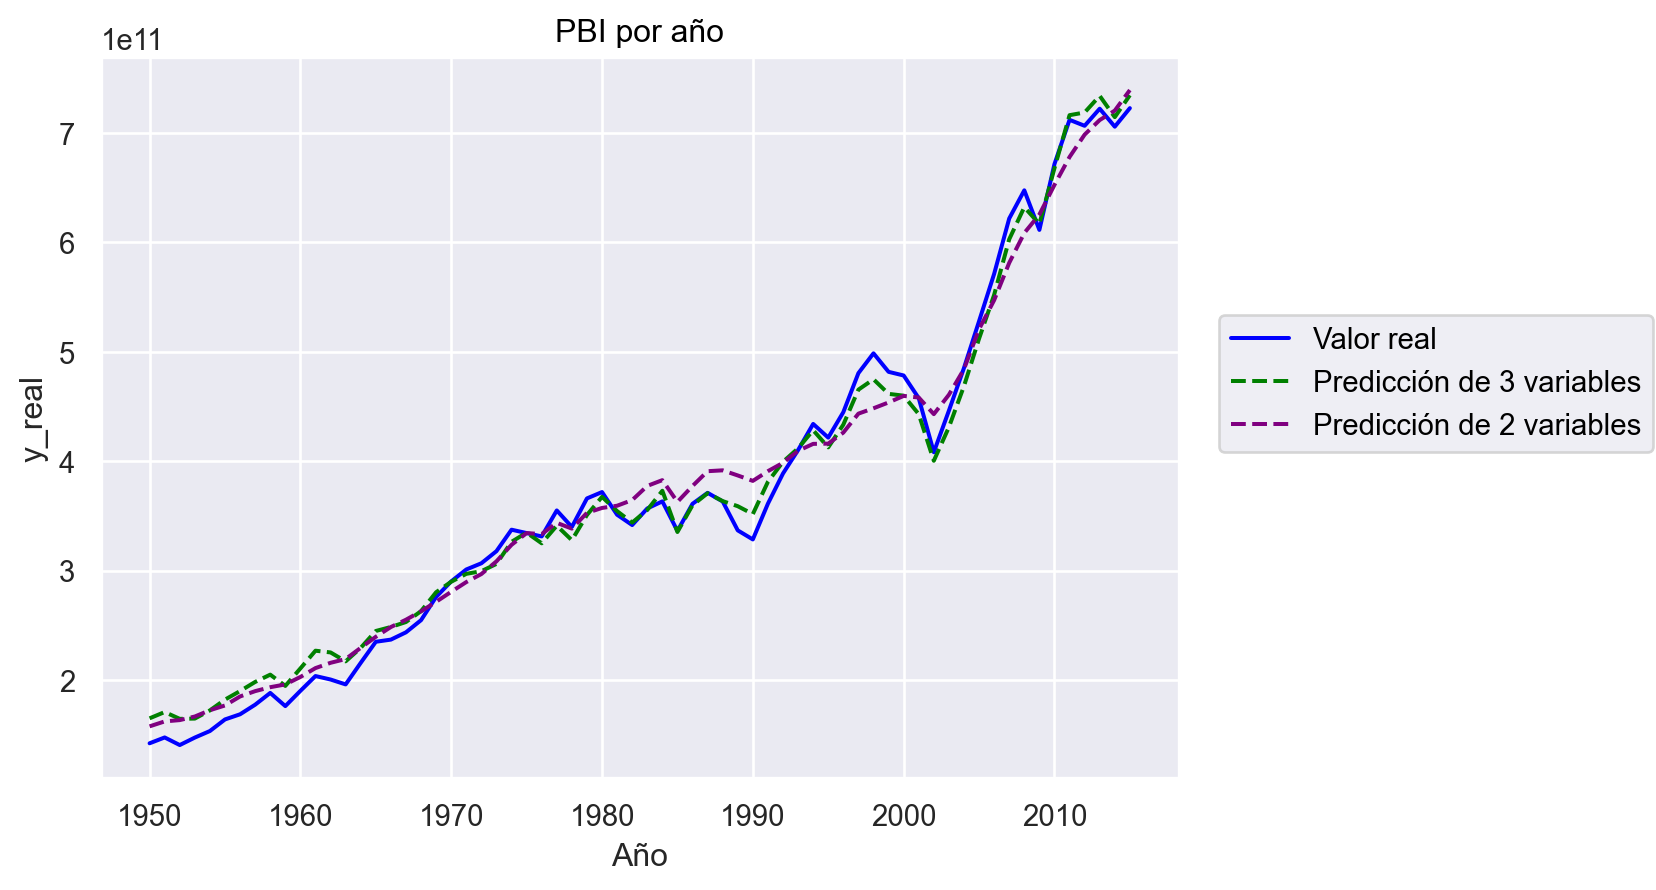

In [5]:
# Creamos vector de validacion y matriz de diseño
y_2, X_2 = (
    Formula("PBI_a_precios_de_mercado.oferta ~ Industria_manufacturera.oferta + Servs_Socs_Comunales_Y_Personales.oferta - 1")
    .get_model_matrix(macroFullOfertas)
    )

# Creamos el modelo lineal multivariado
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X_2,y_2)
y_pred2 = modelo.predict(X_2)
r2 = r2_score(y_2, y_pred2)
ecm = mean_squared_error(y_2, y_pred2)

# Metricas de "bondad" del ajuste
print("Coeficiente de determinacion: ", r2)
print("Error cuadratico medio: ", np.sqrt(ecm)/1e10)

# Procesamos datos a array
y_2 = y_2.values.flatten()
y_pred = y_pred.flatten()
y_pred6 = y_pred6.flatten()
y_pred3 = y_pred3.flatten()
y_pred2 = y_pred2.flatten()
años = macroFull["Anio"].values.flatten()

# Creamos dataframe temporal
plot_data2 = pd.DataFrame({
    "Año": años,
    "y_real": y_2,  
    "y_pred": y_pred,
    "y_pred6": y_pred6,  
    "y_pred3": y_pred3,  
    "y_pred2": y_pred2,  
})

# Grafico entre valor real y valor predicho
(
    so.Plot(data=plot_data2, x="Año")
    .add(so.Line(color="blue"), y="y_real", label="Valor real")
    #.add(so.Line(color="red", linestyle="dashed"), y="y_pred", label="Predicción de 10 variables")
    #.add(so.Line(color="yellow", linestyle="dashed"), y="y_pred6", label="Predicción de 6 variables")
    .add(so.Line(color="green", linestyle="dashed"), y="y_pred3", label="Predicción de 3 variables")
    .add(so.Line(color="purple", linestyle="dashed"), y="y_pred2", label="Predicción de 2 variables")
    .label(title="PBI por año", xlabel="Año")
)


2. Hallar un escalamiento lineal $f(x)$ que transforme los valores en el intervalo $[2, 5]$ a valores en el intevalo $[0, 1]$

Solucion:

Necesitamos que $ f(0) = 2$ y que $f(1)=5$ en alguna funcion $y=mx+b$. Es trivial pues reemplazamos $b=2$, y luego
$$ y=mx+2$$
Reemplazamos con segunda condicion,
$$ 5=m+2$$
$$ m = 3$$
Por tanto, $ f(x)=3x+2$.
Me acabo de dar cuenta que era al reves. Considerar funcion pedida $f^{-1}(x) =\frac{1}{3}x -\frac{2}{3}$. 


3. Para este ejercicio utilizar los datos `CollegeBasketballPlayers2009-2021.csv`.
    1. Ajustar un modelo de regresion para predecir los puntos promedio (pts) en funcion de las
demas variables. Comparar los coeficientes del modelo obtenido sin escalar variables con
los coeficientes que se obtienen si primero se escalan las variables utilizando escalamiento
MinMax.
    2. A partir de los resultados, segun los coeficientes obtenidos, ¿cuales son las 5 variables de
mayor peso en el modelo?


In [6]:
dataCollegeBasketballPlayers20092021 = pd.read_csv("../../datasets/CollegeBasketballPlayers2009-2021.csv", low_memory=False)
display(dataCollegeBasketballPlayers20092021.head())
display(dataCollegeBasketballPlayers20092021.info())


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61061 non-null  object 
 1   team                             61061 non-null  object 
 2   conf                             61061 non-null  object 
 3   GP                               61061 non-null  int64  
 4   Min_per                          61061 non-null  float64
 5   Ortg                             61061 non-null  float64
 6   usg                              61061 non-null  float64
 7   eFG                              61061 non-null  float64
 8   TS_per                           61061 non-null  float64
 9   ORB_per                          61061 non-null  float64
 10  DRB_per                          61061 non-null  float64
 11  AST_per                          61061 non-null  float64
 12  TO_per            

None